In [101]:
!pip install seaborn scikit-learn

In [102]:
!pip install pycaret

In [103]:
from pycaret.classification import *

In [104]:
import pycaret
pycaret.__version__

'3.3.2'

In [105]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
df_bank = pd.read_csv('../bank.csv')
df_bank.drop(columns = ['duration'], inplace = True)

In [173]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(6), object(10)
memory usage: 1.4+ MB


In [175]:
df_bank['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [177]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [179]:
df_bank['pdays'] = np.where(df_bank['pdays'] == -1, 'no', 'yes')

In [181]:
df_bank['pdays'].value_counts()

no     8324
yes    2838
Name: pdays, dtype: int64

In [183]:
#수치형 컬럼 추출하는 방법
num_cols = list(df_bank.describe().columns)
num_cols

['age', 'balance', 'day', 'campaign', 'previous']

In [185]:
#범주형 컬럼 추출하는 방법
cat_cols = list(set(df_bank.columns) - set(df_bank.describe().columns))
cat_cols

['contact',
 'poutcome',
 'deposit',
 'marital',
 'month',
 'housing',
 'education',
 'default',
 'job',
 'loan',
 'pdays']

In [187]:
s = setup(df_bank, target = 'deposit', train_size = 0.8, normalize = True, normalize_method='zscore', session_id = 123)

,Description,Value
0,Session id,123
1,Target,deposit
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(11162, 16)"
5,Transformed data shape,"(11162, 48)"
6,Transformed train set shape,"(8929, 48)"
7,Transformed test set shape,"(2233, 48)"
8,Numeric features,5
9,Categorical features,10


In [211]:
X_train_transformed = get_config('X_train_transformed')
y_train = get_config('y_train')
X_test_transformed = get_config('X_test_transformed')
y_test = get_config('y_test')

C:\Users\juran\anaconda3\envs\myenv\Lib\site-packages\pycaret\internal\pycaret_experiment\pycaret_experiment.py:321: UserWarning: Variable: 'y_train' used to return the transformed values in PyCaret 2.x. From PyCaret 3.x, this will return the raw values. If you need the transformed values, call get_config with 'y_train_transformed' instead.
  warnings.warn(msg)  # print on screen
C:\Users\juran\anaconda3\envs\myenv\Lib\site-packages\pycaret\internal\pycaret_experiment\pycaret_experiment.py:321: UserWarning: Variable: 'y_test' used to return the transformed values in PyCaret 2.x. From PyCaret 3.x, this will return the raw values. If you need the transformed values, call get_config with 'y_test_transformed' instead.
  warnings.warn(msg)  # print on screen


In [215]:
X_train_transformed

,age,job_management,job_housemaid,job_self-employed,job_student,job_retired,job_admin.,job_blue-collar,job_services,job_technician,job_unemployed,job_entrepreneur,job_unknown,marital_married,marital_single,marital_divorced,education_tertiary,education_primary,education_secondary,education_unknown,default,balance,housing,loan,contact_cellular,contact_unknown,contact_telephone,day,month_aug,month_may,month_mar,month_apr,month_feb,month_jul,month_jan,month_jun,month_nov,month_oct,month_sep,month_dec,campaign,pdays,previous,poutcome_unknown,poutcome_failure,poutcome_success,poutcome_other
6270,0.060709,1.840575,-0.159308,-0.194663,-0.180920,-0.275287,-0.369376,-0.456886,-0.299277,-0.446642,-0.182564,-0.173182,-0.078003,0.867073,-0.677838,-0.359318,1.433800,-0.393650,-0.986539,-0.217975,-0.122495,-0.694444,-0.946017,-0.389847,0.623242,-0.516260,-0.272926,1.468727,2.512540,-0.581101,-0.158196,-0.296604,-0.27055,-0.398570,-0.179927,-0.352126,-0.303258,-0.191857,-0.172838,-0.099768,-0.185630,-0.581101,-0.360408,0.580756,-0.355133,-0.322038,-0.220220
10963,-0.191067,-0.543309,6.277158,-0.194663,-0.180920,-0.275287,-0.369376,-0.456886,-0.299277,-0.446642,-0.182564,-0.173182,-0.078003,-1.153306,1.475280,-0.359318,-0.697447,2.540326,-0.986539,-0.217975,-0.122495,-0.446629,1.057063,-0.389847,-1.604512,1.937007,-0.272926,-1.140605,-0.398004,1.720872,-0.158196,-0.296604,-0.27055,-0.398570,-0.179927,-0.352126,-0.303258,-0.191857,-0.172838,-0.099768,0.188437,-0.581101,-0.360408,0.580756,-0.355133,-0.322038,-0.220220
9909,0.144635,-0.543309,-0.159308,5.137078,-0.180920,-0.275287,-0.369376,-0.456886,-0.299277,-0.446642,-0.182564,-0.173182,-0.078003,0.867073,-0.677838,-0.359318,-0.697447,-0.393650,1.013644,-0.217975,-0.122495,-0.189600,1.057063,-0.389847,-1.604512,1.937007,-0.272926,-1.140605,-0.398004,1.720872,-0.158196,-0.296604,-0.27055,-0.398570,-0.179927,-0.352126,-0.303258,-0.191857,-0.172838,-0.099768,-0.559698,-0.581101,-0.360408,0.580756,-0.355133,-0.322038,-0.220220
2143,-1.366022,-0.543309,-0.159308,-0.194663,5.527317,-0.275287,-0.369376,-0.456886,-0.299277,-0.446642,-0.182564,-0.173182,-0.078003,-1.153306,1.475280,-0.359318,-0.697447,-0.393650,1.013644,-0.217975,-0.122495,-0.384675,-0.946017,-0.389847,0.623242,-0.516260,-0.272926,1.231515,-0.398004,1.720872,-0.158196,-0.296604,-0.27055,-0.398570,-0.179927,-0.352126,-0.303258,-0.191857,-0.172838,-0.099768,-0.185630,-0.581101,-0.360408,0.580756,-0.355133,-0.322038,-0.220220
4869,2.662397,-0.543309,-0.159308,-0.194663,-0.180920,3.632568,-0.369376,-0.456886,-0.299277,-0.446642,-0.182564,-0.173182,-0.078003,0.867073,-0.677838,-0.359318,1.433800,-0.393650,-0.986539,-0.217975,-0.122495,-0.338924,-0.946017,-0.389847,0.623242,-0.516260,-0.272926,0.994303,-0.398004,-0.581101,6.321291,-0.296604,-0.27055,-0.398570,-0.179927,-0.352126,-0.303258,-0.191857,-0.172838,-0.099768,-0.559698,-0.581101,-0.360408,0.580756,-0.355133,-0.322038,-0.220220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,1.403516,1.840575,-0.159308,-0.194663,-0.180920,-0.275287,-0.369376,-0.456886,-0.299277,-0.446642,-0.182564,-0.173182,-0.078003,0.867073,-0.677838,-0.359318,1.433800,-0.393650,-0.986539,-0.217975,-0.122495,-0.399925,-0.946017,-0.389847,0.623242,-0.516260,-0.272926,-0.666181,-0.398004,-0.581101,-0.158196,-0.296604,-0.27055,-0.398570,-0.179927,-0.352126,-0.303258,-0.191857,-0.172838,10.023268,-0.559698,1.720872,0.964632,-1.721894,-0.355133,3.105226,-0.220220
10609,-1.282097,-0.543309,-0.159308,-0.194663,5.527317,-0.275287,-0.369376,-0.456886,-0.299277,-0.446642,-0.182564,-0.173182,-0.078003,-1.153306,1.475280,-0.359318,1.433800,-0.393650,-0.986539,-0.217975,-0.122495,3.682987,1.057063,-0.389847,0.623242,-0.516260,-0.272926,1.350121,-0.398004,1.720872,-0.158196,-0.296604,-0.27055,-0.398570,-0.179927,-0.352126,-0.303258,-0.191857,-0.172838,-0.099768,-0.185630,-0.581101,-

In [231]:
get_config('y_test')

C:\Users\juran\anaconda3\envs\myenv\Lib\site-packages\pycaret\internal\pycaret_experiment\pycaret_experiment.py:321: UserWarning: Variable: 'y_test' used to return the transformed values in PyCaret 2.x. From PyCaret 3.x, this will return the raw values. If you need the transformed values, call get_config with 'y_test_transformed' instead.
  warnings.warn(msg)  # print on screen


8368     no
9300     no
5254    yes
1581    yes
9123     no
       ... 
6546     no
242     yes
6928     no
142     yes
4632    yes
Name: deposit, Length: 2233, dtype: category
Categories (2, object): ['no', 'yes']

In [189]:
from pycaret.datasets import get_data
from pycaret.classification import setup, get_config

# Transformed data 확인
transformed_data = get_config('X_transformed')

# 변환된 데이터 출력
pd.DataFrame(transformed_data)

,age,job_management,job_housemaid,job_self-employed,job_student,job_retired,job_admin.,job_blue-collar,job_services,job_technician,job_unemployed,job_entrepreneur,job_unknown,marital_married,marital_single,marital_divorced,education_tertiary,education_primary,education_secondary,education_unknown,default,balance,housing,loan,contact_cellular,contact_unknown,contact_telephone,day,month_aug,month_may,month_mar,month_apr,month_feb,month_jul,month_jan,month_jun,month_nov,month_oct,month_sep,month_dec,campaign,pdays,previous,poutcome_unknown,poutcome_failure,poutcome_success,poutcome_other
6270,0.060709,1.840575,-0.159308,-0.194663,-0.180920,-0.275287,-0.369376,-0.456886,-0.299277,-0.446642,-0.182564,-0.173182,-0.078003,0.867073,-0.677838,-0.359318,1.433800,-0.393650,-0.986539,-0.217975,-0.122495,-0.694444,-0.946017,-0.389847,0.623242,-0.516260,-0.272926,1.468727,2.512540,-0.581101,-0.158196,-0.296604,-0.270550,-0.39857,-0.179927,-0.352126,-0.303258,-0.191857,-0.172838,-0.099768,-0.185630,-0.581101,-0.360408,0.580756,-0.355133,-0.322038,-0.220220
10963,-0.191067,-0.543309,6.277158,-0.194663,-0.180920,-0.275287,-0.369376,-0.456886,-0.299277,-0.446642,-0.182564,-0.173182,-0.078003,-1.153306,1.475280,-0.359318,-0.697447,2.540326,-0.986539,-0.217975,-0.122495,-0.446629,1.057063,-0.389847,-1.604512,1.937007,-0.272926,-1.140605,-0.398004,1.720872,-0.158196,-0.296604,-0.270550,-0.39857,-0.179927,-0.352126,-0.303258,-0.191857,-0.172838,-0.099768,0.188437,-0.581101,-0.360408,0.580756,-0.355133,-0.322038,-0.220220
9909,0.144635,-0.543309,-0.159308,5.137078,-0.180920,-0.275287,-0.369376,-0.456886,-0.299277,-0.446642,-0.182564,-0.173182,-0.078003,0.867073,-0.677838,-0.359318,-0.697447,-0.393650,1.013644,-0.217975,-0.122495,-0.189600,1.057063,-0.389847,-1.604512,1.937007,-0.272926,-1.140605,-0.398004,1.720872,-0.158196,-0.296604,-0.270550,-0.39857,-0.179927,-0.352126,-0.303258,-0.191857,-0.172838,-0.099768,-0.559698,-0.581101,-0.360408,0.580756,-0.355133,-0.322038,-0.220220
2143,-1.366022,-0.543309,-0.159308,-0.194663,5.527317,-0.275287,-0.369376,-0.456886,-0.299277,-0.446642,-0.182564,-0.173182,-0.078003,-1.153306,1.475280,-0.359318,-0.697447,-0.393650,1.013644,-0.217975,-0.122495,-0.384675,-0.946017,-0.389847,0.623242,-0.516260,-0.272926,1.231515,-0.398004,1.720872,-0.158196,-0.296604,-0.270550,-0.39857,-0.179927,-0.352126,-0.303258,-0.191857,-0.172838,-0.099768,-0.185630,-0.581101,-0.360408,0.580756,-0.355133,-0.322038,-0.220220
4869,2.662397,-0.543309,-0.159308,-0.194663,-0.180920,3.632568,-0.369376,-0.456886,-0.299277,-0.446642,-0.182564,-0.173182,-0.078003,0.867073,-0.677838,-0.359318,1.433800,-0.393650,-0.986539,-0.217975,-0.122495,-0.338924,-0.946017,-0.389847,0.623242,-0.516260,-0.272926,0.994303,-0.398004,-0.581101,6.321291,-0.296604,-0.270550,-0.39857,-0.179927,-0.352126,-0.303258,-0.191857,-0.172838,-0.099768,-0.559698,-0.581101,-0.360408,0.580756,-0.355133,-0.322038,-0.220220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6546,-0.107141,-0.543309,-0.159308,-0.194663,-0.180920,-0.275287,-0.369376,-0.456886,3.341384,-0.446642,-0.182564,-0.173182,-0.078003,0.867073,-0.677838,-0.359318,-0.697447,-0.393650,1.013644,-0.217975,-0.122495,-0.481259,1.057063,2.565111,0.623242,-0.516260,-0.272926,-1.615029,-0.398004,-0.581101,-0.158196,-0.296604,3.696179,-0.39857,-0.179927,-0.352126,-0.303258,-0.191857,-0.172838,-0.099768,-0.185630,-0.581101,-0.360408,0.580756,-0.355133,-0.322038,-0.220220
242,0.396411,-0.543309,-0.159308,-0.194663,-0.180920,-0.275287,2.707266,-0.456886,-0.299277,-0.446642,-0.182564,-0.173182,-0.078003,-1.153306,1.475280,-0.359318,-0.697447,-0.393650,1.013644,-0.217975,-0.122495,-0.211522,1.057063,-0.389847,-1.604512,1.937007,-0.272926,-1.259211,-0.398004,-0.581101,-0.158196,-0.296604,-0.270550,-0.39857,-0.179927,2.839890,-0.303258,-0.191857,-0.172838,-0.099768,-0.185630,-0.581101,-0

In [197]:
# compare baseline models
top3_models = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7319,0.7894,0.7319,0.7386,0.7277,0.4566,0.4661,0.3030
lightgbm,Light Gradient Boosting Machine,0.7314,0.7872,0.7314,0.7367,0.7279,0.4563,0.4641,0.1590
rf,Random Forest Classifier,0.7171,0.7784,0.7171,0.7184,0.7153,0.4293,0.4322,0.2640
ada,Ada Boost Classifier,0.7151,0.7703,0.7151,0.7200,0.7111,0.4230,0.4307,0.1650
ridge,Ridge Classifier,0.7028,0.7623,0.7028,0.7094,0.6975,0.3971,0.4070,0.0740
lda,Linear Discriminant Analysis,0.7028,0.7623,0.7028,0.7094,0.6975,0.3971,0.4070,0.0780
lr,Logistic Regression,0.7022,0.7630,0.7022,0.7084,0.6971,0.3962,0.4056,0.0740
et,Extra Trees Classifier,0.6958,0.7517,0.6958,0.6959,0.6946,0.3873,0.3887,0.2770
knn,K Neighbors Classifier,0.6781,0.7209,0.6781,0.6784,0.6763,0.3509,0.3530,0.0970
nb,Naive Bayes,0.6776,0.7376,0.6776,0.6952,0.6646,0.3416,0.3644,0.0800


In [201]:
top3_models

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lamb

In [203]:
top3_models[0]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [205]:
models = [top3_models[0], top3_models[1], top3_models[2]]

In [217]:
from sklearn.ensemble import VotingClassifier

# 상위 3개 모델로 Voting Classifier 생성
models = [top3_models[0], top3_models[1], top3_models[2]]
voting_clf = VotingClassifier(estimators=[('GBC', models[0]), ('LGBMC', models[1]), ('RFC', models[2])], voting='soft')

# 모델 훈련
voting_clf.fit(X_train_transformed, y_train)

# 예측 및 평가
predictions = voting_clf.predict(X_test_transformed)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

[LightGBM] [Info] Number of positive: 4231, number of negative: 4698
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 538
[LightGBM] [Info] Number of data points in the train set: 8929, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473849 -> initscore=-0.104699
[LightGBM] [Info] Start training from score -0.104699
              precision    recall  f1-score   support

          no       0.72      0.83      0.77      1175
         yes       0.77      0.64      0.70      1058

    accuracy                           0.74      2233
   macro avg       0.74      0.73      0.73      2233
weighted avg       0.74      0.74      0.73      2233



In [227]:
plot_model(voting_clf, plot='auc')

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=[0 1] and y_pred=['no' 'yes']. Make sure that the predictions provided by the classifier coincides with the true labels.

<Figure size 800x550 with 0 Axes>

In [233]:
get_config('y_test')

C:\Users\juran\anaconda3\envs\myenv\Lib\site-packages\pycaret\internal\pycaret_experiment\pycaret_experiment.py:321: UserWarning: Variable: 'y_test' used to return the transformed values in PyCaret 2.x. From PyCaret 3.x, this will return the raw values. If you need the transformed values, call get_config with 'y_test_transformed' instead.
  warnings.warn(msg)  # print on screen


8368     no
9300     no
5254    yes
1581    yes
9123     no
       ... 
6546     no
242     yes
6928     no
142     yes
4632    yes
Name: deposit, Length: 2233, dtype: category
Categories (2, object): ['no', 'yes']

In [243]:
get_config('y_test').dtype

C:\Users\juran\anaconda3\envs\myenv\Lib\site-packages\pycaret\internal\pycaret_experiment\pycaret_experiment.py:321: UserWarning: Variable: 'y_test' used to return the transformed values in PyCaret 2.x. From PyCaret 3.x, this will return the raw values. If you need the transformed values, call get_config with 'y_test_transformed' instead.
  warnings.warn(msg)  # print on screen


CategoricalDtype(categories=['no', 'yes'], ordered=False)

In [239]:
df_bank['deposit']

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

In [247]:
df_bank['deposit'] = df_bank['deposit'].astype('category')

In [249]:
plot_model(voting_clf, plot='auc')

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=[0 1] and y_pred=['no' 'yes']. Make sure that the predictions provided by the classifier coincides with the true labels.

<Figure size 800x550 with 0 Axes>

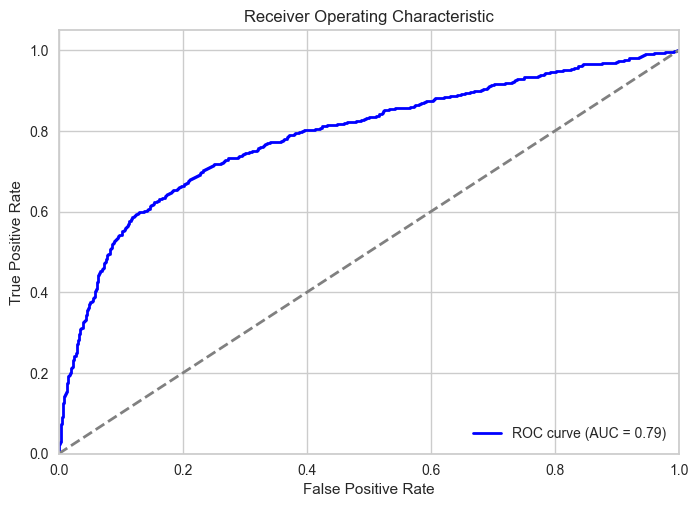

In [255]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# VotingClassifier의 예측 확률 얻기
y_proba = voting_clf.predict_proba(X_test_transformed)[:, 1]
y_pred = voting_clf.predict(X_test_transformed)

# y_true와 y_pred를 문자열로 변환
y_true_str = y_test.astype(str)
y_pred_str = y_pred.astype(str)

# ROC Curve 계산
fpr, tpr, _ = roc_curve(y_true_str, y_proba, pos_label='yes')
roc_auc = auc(fpr, tpr)

# ROC Curve 시각화
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
